<a href="https://colab.research.google.com/github/lhalloran/enseignement_extras/blob/main/Notebook_pour_imagerie_thermique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook_pour_imagerie_thermique.ipynb
L Halloran
23.3.2021

Ceci est un notebook pour colab (https://colab.research.google.com/) pour vous aider à traiter vos données dans la première partie de l'activité "imagerie thermique". Si vous avez des questions, n'hésitez pas à me contacter.

ATTENTION: Sauvegardez vos modifications... ça ne se fait pas automatiquement. 😲


Importer les modules qu'il nous faut...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from scipy.optimize import curve_fit

In [ ]:
#Use to import the file into google Colab drive
from google.colab import files 
#Use to import io, which opens the file from the Colab drive
import io

ici, vous allez uploader votre fichier...

In [ ]:
uploaded = files.upload()


Saving exemple_T.xlsx to exemple_T.xlsx


maintenant, on convertit le fichier à un "data frame". On le fera pour chaque onglet de votre fichier excel...

In [ ]:
data1 = pd.read_excel('exemple_T.xlsx','x=10mm') # changez le nom du fichier et les noms des onglets/feuilles
data2 = pd.read_excel('exemple_T.xlsx','x=20mm')
 
# etc.


ceci efface le fichier uploadé (si vous voulez re-uploader un autre avec le même nom, par exemple)

In [ ]:
!rm {'exemple_T.xlsx'}

rm: cannot remove 'exemple_T.xlsx': No such file or directory


on verifie ce qu'on a uploadé...

In [ ]:
print(data1)
print(data2) 
# etc.

   temps (s)  T (degC)  delta T (degC)
0          0      20.0             0.0
1         60      27.3             7.3
2        120      25.3             5.3
3        180      25.0             5.0
4        240      23.8             3.8
5        300      23.4             3.4
6        360      23.0             3.0
7        420      22.7             2.7
   temps (s)  T (degC)  delta T (degC)
0          0      20.0             0.0
1         60      28.0             8.0
2        120      27.0             7.0
3        180      26.5             6.5
4        240      24.8             4.8


pour selectioner les données qu'il vous faut pour l'ajustement de courbes...
il faut ecrire le nom exacte que vous avez donné aux colonnes de temperature et temps, e.g., `'temps (s)'`

In [ ]:
deltaT = data1['delta T (degC)'] # deltaT = T - T0
temps = data1['temps (s)']

# ici on enleve la première valeur (ça ne marchera pas avec l'équation car division par 0)...
deltaT = deltaT[1:]
temps = temps[1:]

definir l'equation a ajuster...

In [ ]:
def function_for_fit(t,alpha,c0): #eqn. 48, avec x = 10 mm. il faudra changer cet x pour chaque x different. n'oublie pas qu'on utilise des unitées SI (donc metres pas centimetres)
    return c0/(np.sqrt(4*np.pi*alpha*t) ) * np.exp( -0.01**2/(4*alpha*t) )

[6.07469240e-06 5.32318766e-01]
[[3.75719918e-11 1.51822630e-06]
 [1.51822630e-06 6.15104664e-02]]


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


voir si ce qu'on a fait a du sens (faire une figure avec des valeurs choisis au hazard)...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


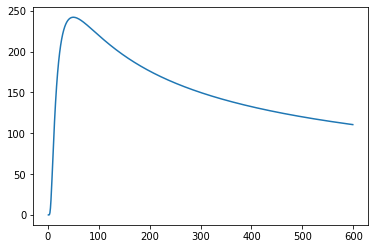

In [ ]:
test_t = np.arange(600)
plt.plot(test_t,function_for_fit(test_t,1E-6,10)) # test plot avec alpha = 1E-6 m^2/s et c0 = 10 degC.

faire l'ajustement de courbe

In [ ]:
popt, pcov = curve_fit(function_for_fit, temps, deltaT)
print(popt)
print(pcov)

notre fonction a 2 parametres (alpha et c0). c'est alpha qui nous interesse. popt contient les valeurs, pvar contient les variances de ces valeurs.

In [ ]:
alpha_fit = popt[0]
alpha_ecart_type = np.sqrt(pcov[0,0])
c0_fit = popt[1]
c0_ecart_type = np.sqrt(pcov[1,1])
print('alpha = '+ str(alpha_fit))
print('alpha ecart type'+ str(alpha_ecart_type))
print('c0 = '+ str(c0_fit))
print('c0 ecart type'+ str(c0_ecart_type))


6.07469240004863e-06
6.129599640883778e-06


maintenant notez ces valeurs et refaire ces derniers etapes pour chaque distance x...